Zadanie 1. [1 punkt za całość]

Geometric Image Transformations

Zainstaluj potrzebne do zadania biblioteki

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Używając OpenCV możesz załadować zdjęcie, a następnie przeskalować je do odpowiedniego rozmiaru, uzywają funkcji `cv2.resize()`.

In [43]:
# Load an image
img = cv2.imread('images/obraz1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to 1/5 its original size
resized_img = cv2.resize(img_rgb, (0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)

Wyświetlmy teraz przeskalowany obraz

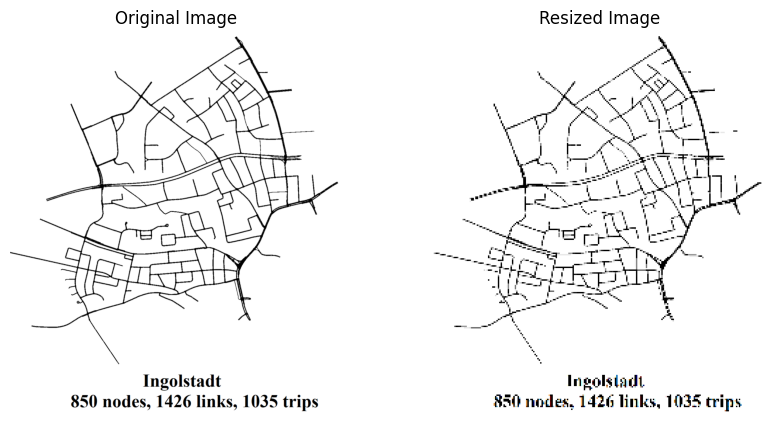

In [44]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Resized Image')
plt.imshow(resized_img)
plt.axis('off')
plt.show()

Przy użyciu OpenCV możemy też stosować afiniczne transformacje przestrzeni obrazów

In [45]:
# Define three points in the source image
rows, cols, ch = img_rgb.shape
pts1 = np.float32([[50,50], [200,50], [50,200]])

# Define where these points should be in the output image
pts2 = np.float32([[10,100], [200,50], [100,250]])
pts3 = np.float32([[50,100], [200,50], [100,400]])

# Get the affine transformation matrices
M_1 = cv2.getAffineTransform(pts1, pts2)
M_2 = cv2.getAffineTransform(pts1, pts3)

# Apply first affine transformation
affine_transformed_one = cv2.warpAffine(img_rgb, M_1, (cols, rows))

# Apply second affine transformation
affine_transformed_two = cv2.warpAffine(img_rgb, M_2, (cols, rows))

Wyświetlmy porównanie obrazu przed i po transformacjach

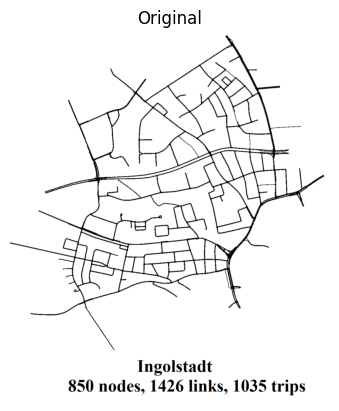

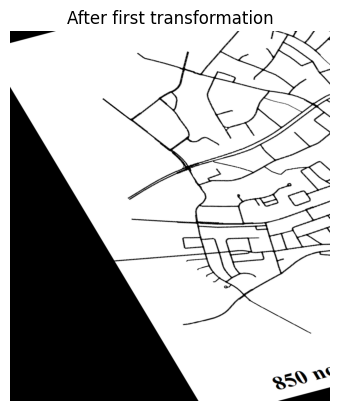

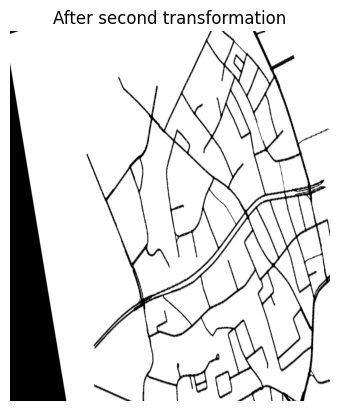

In [46]:
plt.plot()
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

plt.plot()
plt.title('After first transformation')
plt.imshow(affine_transformed_one)
plt.axis('off')
plt.show()

plt.plot()
plt.title('After second transformation')
plt.imshow(affine_transformed_two)
plt.axis('off')
plt.show()

Dopuszczalne są też przekształcenia perspektywy. W tym celu potrzebne jest wyspecyfikowanie czterech punktów z pierwotnego obrazu i odpowiadających im punktów z docelowego obrazu

In [47]:
# Define four points in the source image
pts1 = np.float32([[56,65], [368,52], [28,387], [389,390]])

# Define where these points should be in the output image
pts2 = np.float32([[0,0], [300,0], [0,300], [300,300]])

# Get the perspective transformation matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation
perspective_transformed = cv2.warpPerspective(img_rgb, M, (300, 300))

Wyświetlmy porównanie zdjęć

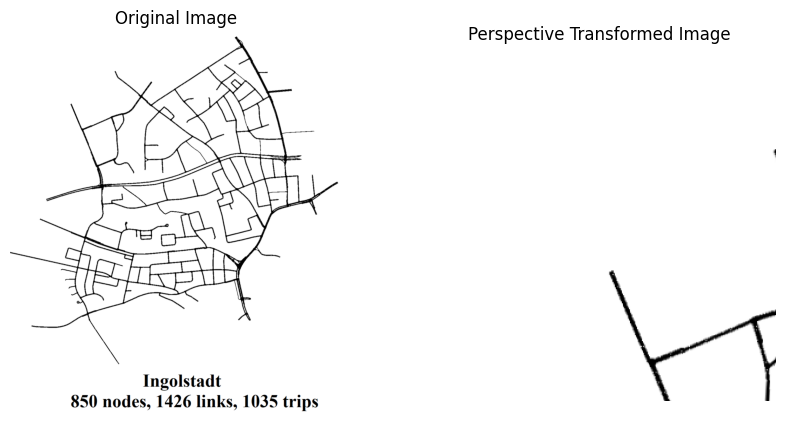

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Perspective Transformed Image')
plt.imshow(perspective_transformed)
plt.axis('off')
plt.show()

Kolejną przydatną funkcją jest obrót obrazu o wybrany kąt, jesteśmy w stanie to zrobić przy pomocy funkcji `cv2.getRotationMatrix2D()`

In [49]:
# Get the rotation matrix
center = (cols / 2, rows / 2)
angle = 45
scale = 1.0
M = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation
rotated_img = cv2.warpAffine(img_rgb, M, (cols, rows))

Wyświetlmy porównanie

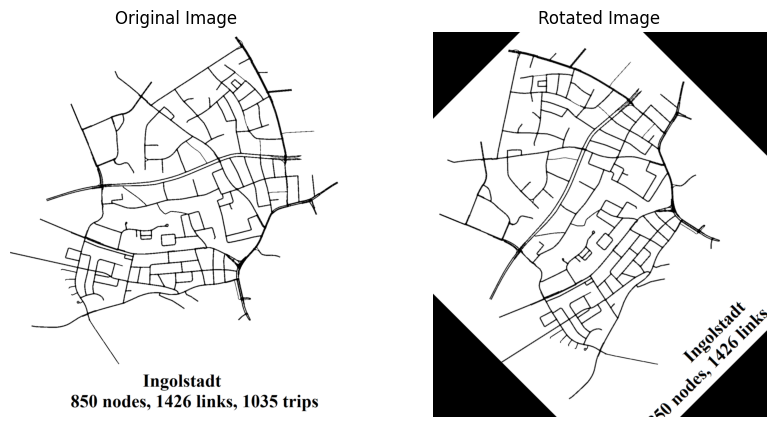

In [50]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Rotated Image')
plt.imshow(rotated_img)
plt.axis('off')
plt.show()

Ostatnią omawianą funkcją będzie mapowanie obrazów

In [56]:
# Create mapping arrays
map_x = np.zeros((rows, cols), dtype=np.float32)
map_y = np.zeros((rows, cols), dtype=np.float32)

for i in range(rows):
    for j in range(cols):
        map_x[i,j] = cols - j
        map_y[i,j] = rows - i

# Apply remapping
remapped_img = cv2.remap(img_rgb, map_x, map_y, interpolation=cv2.INTER_LINEAR)

Wyświetlmy porównanie

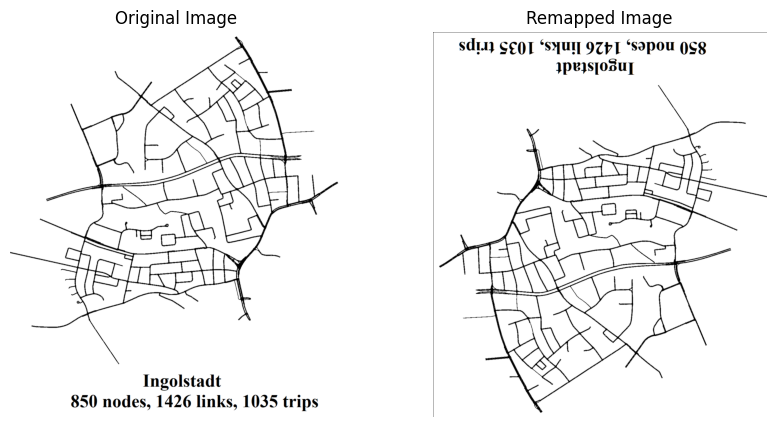

In [57]:
# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Remapped Image')
plt.imshow(remapped_img)
plt.axis('off')
plt.show()

[1/4 punktu] Image translation - Translate the image 100 pixels to the right and 50 pixels down.

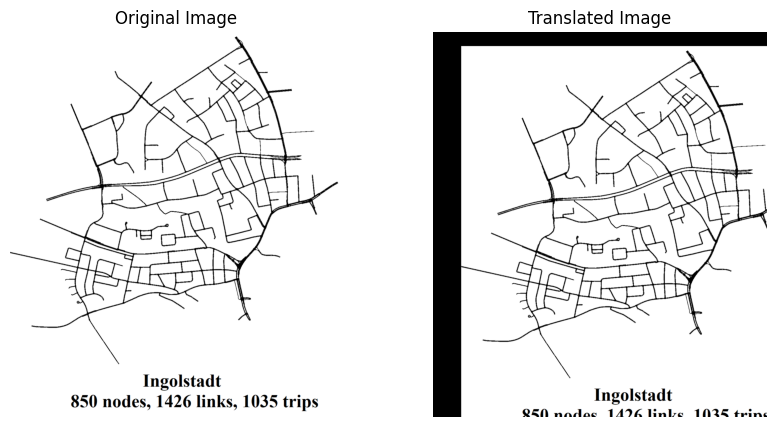

In [52]:
# Define the translation matrix
M = np.float32([[1, 0, 100], [0, 1, 50]])

# Apply the translation
translated_img = cv2.warpAffine(img_rgb, M, (cols, rows))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Translated Image')
plt.imshow(translated_img)
plt.axis('off')
plt.show()

[1/4 punktu] Image scaling - Scale the image by 1.5 times along the x-axis and 0.5 times along the y-axis.

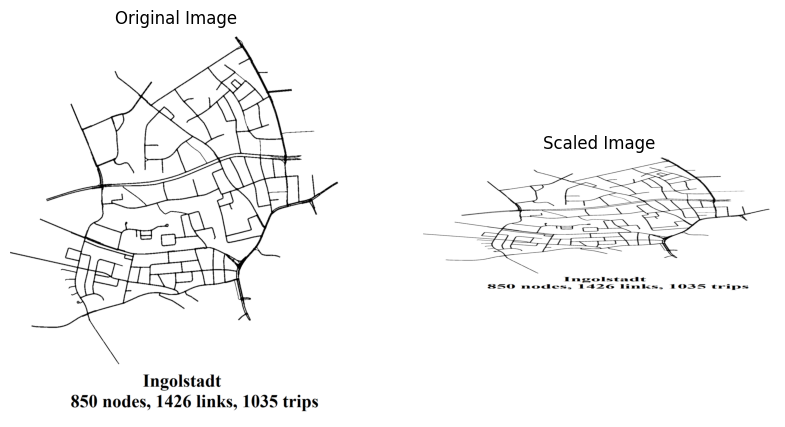

In [53]:
# Apply scaling
scaled_img = cv2.resize(img_rgb, None, fx=1.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Scaled Image')
plt.imshow(scaled_img)
plt.axis('off')
plt.show()

[1/4 punktu] Image Shearing - Apply a shear transformation to the image along the x-axis.

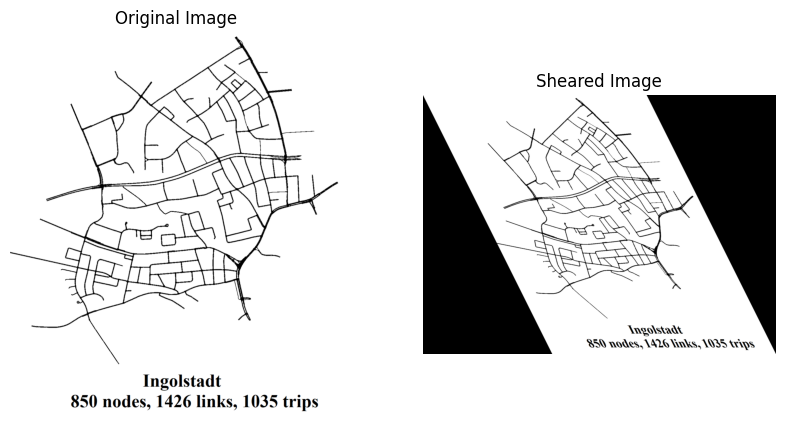

In [54]:
# Define the shear matrix
M = np.float32([[1, 0.5, 0], [0, 1, 0]])

# Apply the shear transformation
sheared_img = cv2.warpAffine(img_rgb, M, (int(cols + 0.5 * rows), rows))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sheared Image')
plt.imshow(sheared_img)
plt.axis('off')
plt.show()

[1/4 punktu] Perspective correction - Given an image of a document taken at an angle, apply a perspective transformation to obtain a top-down view.

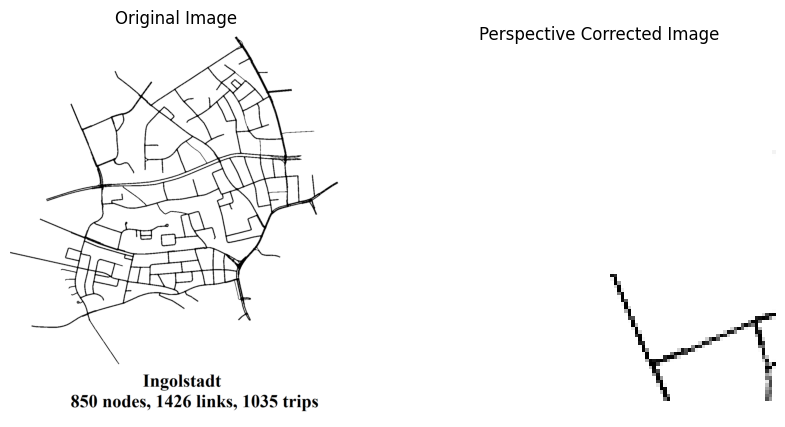

In [55]:
# Define the points from the original image
pts1 = np.float32([[56,65], [368,52], [28,387], [389,390]])  # Replace with actual coordinates

# Define the points for the output image
pts2 = np.float32([[0,0], [100,0], [0,100], [100,100]])

# Get the perspective transformation matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation
corrected_img = cv2.warpPerspective(img_rgb, M, (100, 100))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Perspective Corrected Image')
plt.imshow(corrected_img)
plt.axis('off')
plt.show()

Zadanie 2 [1 punkt za całość] *Zadanie 2 zostanie uwzględnione przy ocenie projektu i przygotowaniu feedbacku, niemniej wszystkie odpowiedzi pozostaną anonimowe.*

Opisz co uważasz o **prezentacji**.

a) [1/2 punktu] Napisz jakie były jej dobre aspekty. Zwróc uwagę na treść, która została przekazana. Czy dowiedziałeś się czegoś nowego? Co to było?

b) [1/2 punktu] Napisz co byś poprawił w prezentacji

*Jeśli jesteś autorem prezentacji:

c) [1 punkt] Napisz co było dla ciebie ciekawe/nowe/nudne w temacie. Czy uważasz, że ten temat jest potrzebny?

*tu wpisz swoją odpowiedź*